Load Cleaned Data

In [2]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")

benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierraleone['Country'] = 'Sierraleone'

df = pd.concat([benin, togo, sierraleone], ignore_index=True)


Metric Comparison - Boxplots

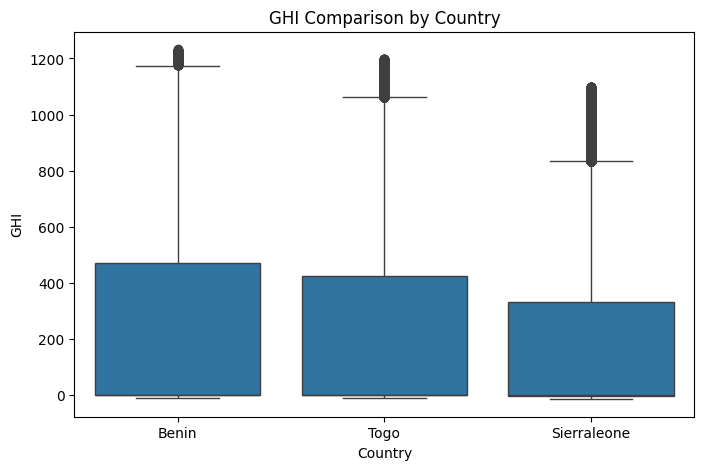

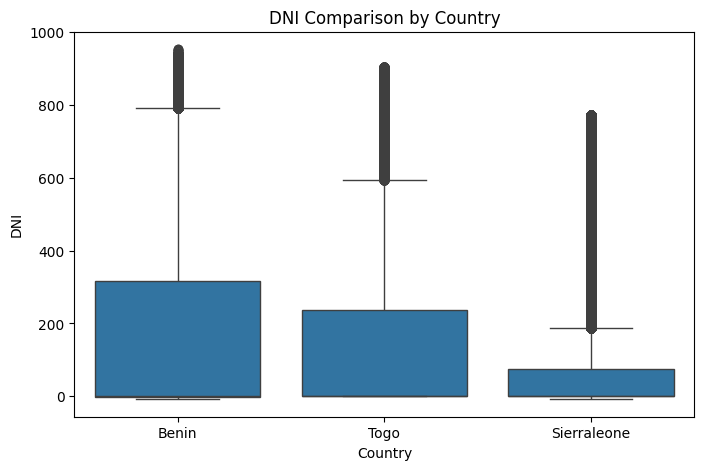

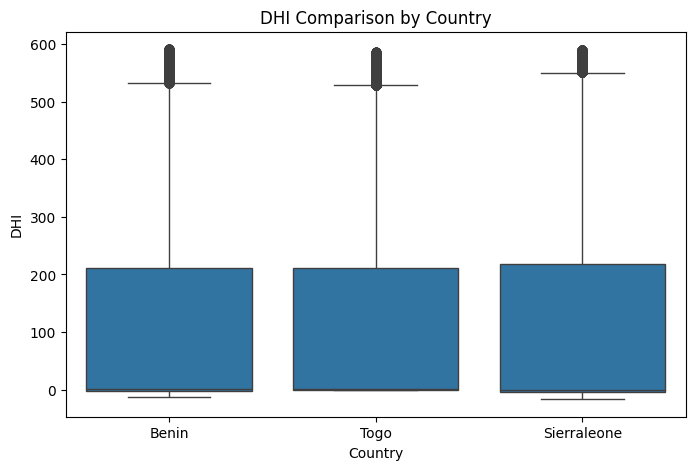

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Country', y=col)
    plt.title(f'{col} Comparison by Country')
    plt.show()


Matrix Comparision Summary Table

In [4]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
display(summary)


GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierraleone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo         223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                    DHI                     
                   mean median         std  
Country                                     
Benin        111.656477    0.5  153.099749  
Sierraleone  108.104278   -0.6  153.691835  
Togo         112.781249    1.5  151.571744

Statical Testing

In [6]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sierraleone['GHI'].dropna()
)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 3833.1842028139195, p-value: 0.0


Statistical Test Result (ANOVA)
F-statistic: 3833.18
p-value: 0.0

Since the p-value is effectively 0.0 (less than 0.05), we can confidently conclude that there are statistically significant differences in the GHI means between Benin, Togo, and Sierra Leone.
This means the countries do not have the same solar potential in terms of GHI, and these differences are not due to random chance.

Key Observations

Benin has the highest average GHI (236.23) and also shows the greatest variability (std: 328.29), suggesting strong but fluctuating solar potential.

Sierra Leone has the lowest mean GHI (185.00) and relatively lower DNI and DHI values, indicating lower solar irradiance overall.

Togo, while slightly below Benin in GHI (223.86), has the highest median DHI (1.5), which might suggest more consistent diffuse solar radiation.



Visual Summary

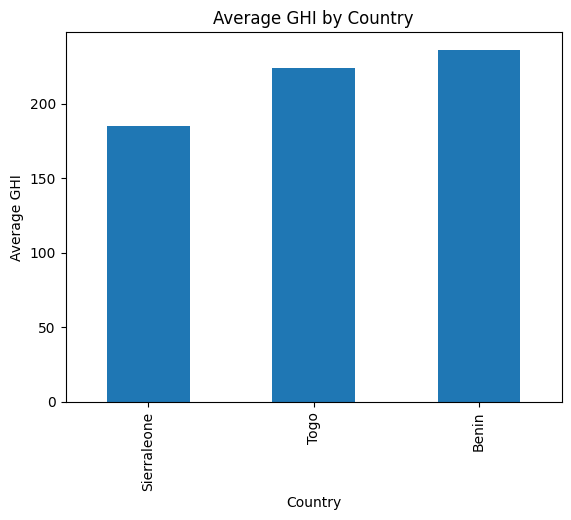

In [7]:
df.groupby('Country')['GHI'].mean().sort_values().plot(kind='bar', title='Average GHI by Country')
plt.ylabel('Average GHI')
plt.show()